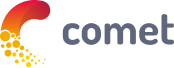

Ultralytics YOLOv8 is a cutting-edge, state-of-the-art (SOTA) model that builds upon the success of previous YOLO versions and introduces new features and improvements to further boost performance and flexibility. YOLOv8 is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and tracking, instance segmentation, image classification and pose estimation tasks.

Data science and machine learning teams use [Comet](https://www.comet.com)’s ML platform to track, compare, explain, and optimize their models across the complete ML lifecycle – from managing experiments to monitoring models in production. 

Comet works with Jupyter Notebooks and Scripts and most importantly it is 100% free to [get started](https://www.comet.com/signup)!


# Install dependencies

In [ ]:
%pip install -U ultralytics "comet_ml>=3.44.0" torch torchvision -qU

# Login to Comet

This will prompt you to enter your API key. You can grab that over [here](https://www.comet.com/signup)

In [ ]:
import comet_ml

comet_ml.login(project_name="comet-example-yolov8-coco128")

# Run Training

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

# train the model
results = model.train(
    data="coco128.yaml",
    project="comet-example-yolov8-coco128",
    batch=32,
    save_period=1,
    save_json=True,
    epochs=3,
)

# Configuring Comet 

You can further configure Comet's logging behaviour with YOLOv8 through Comet specific environment variables.    

## Changing the number of logged image predictions

By default Comet will log 100 image predictions from the validation set. You can change this by setting the `COMET_MAX_IMAGE_PREDICTIONS` environment variable

In [ ]:
import os
from ultralytics import YOLO

os.environ["COMET_MAX_IMAGE_PREDICTIONS"] = "200"

# Load a model
model = YOLO("yolov8s.pt")  # load a pretrained model (recommended for training)

# train the model
results = model.train(
    data="coco128.yaml",
    project="comet-example-yolov8-coco128",
    batch=32,
    save_period=1,
    save_json=True,
    epochs=1,
)

## Changing the frequency of Image Prediction Logging

You may want to change how often batches of image predictions are logged to Comet. 

Set the `COMET_EVAL_BATCH_LOGGING_INTERVAL` environment variable to control this frequency. By default it is set to `1`, which corresponds to logging predictions from every validation batch. e.g. Setting it to `4` will log every fourth batch

**Note:** YOLOv8 will use a batch size that is double your training batch size when running evaluation. 

In [ ]:
import os
from ultralytics import YOLO

os.environ["COMET_EVAL_BATCH_LOGGING_INTERVAL"] = "4"

# Load a model
model = YOLO("yolov8s.pt")  # load a pretrained model (recommended for training)

# train the model
results = model.train(
    data="coco128.yaml",
    project="comet-example-yolov8-coco128",
    batch=16,
    save_period=1,
    save_json=True,
    epochs=2,
)

## Disabling Logging the Confusion Matrix after every Epoch

In case you do not want to log the confusion matrix from your validation set after every epoch, disable it by setting `COMET_EVAL_LOG_CONFUSION_MATRIX` to `false`

The Confusion Matrix will only be logged once, after training is completed. 

In [ ]:
import os
from ultralytics import YOLO

os.environ["COMET_EVAL_LOG_CONFUSION_MATRIX"] = "false"

# Load a model
model = YOLO("yolov8s.pt")  # load a pretrained model (recommended for training)

# train the model
results = model.train(
    data="coco128.yaml",
    project="comet-example-yolov8-coco128",
    batch=32,
    save_period=1,
    save_json=True,
    epochs=2,
)

## Logging to an Offline Experiment

In case you are in a situation where you are using a machine without public internet access you can still enable Comet logging by using an [OfflineExperiment](https://www.comet.com/docs/v2/api-and-sdk/python-sdk/advanced/running-offline/). 

Your run will be saved locally in a directory that you can upload to Comet.   

Set `COMET_MODE` to `offline` to enable this. 

In [ ]:
import os
from ultralytics import YOLO

os.environ["COMET_MODE"] = "offline"

# Load a model
model = YOLO("yolov8s.pt")  # load a pretrained model (recommended for training)

# train the model
results = model.train(
    data="coco128.yaml",
    project="comet-example-yolov8-coco128",
    batch=32,
    save_period=1,
    save_json=True,
    epochs=1,
)